In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [31]:
x_dim, y_dim = 7, 5

In [26]:
x_dim

7

In [27]:
#get S data from the two split files
s_data_file1 = np.loadtxt("../../Hugo/S_A_100hr_sim_final.csv", delimiter=',');
s_data_file2 = np.loadtxt("../../Hugo/S_B_100hr_sim_final.csv", delimiter=',');

#concatenate the data
s_data = np.concatenate([s_data_file1, s_data_file2], axis=0);
print(s_data.shape); #make sure shape is correct

(12003, 420)


In [28]:
def norm_S(s):
    result = s.copy();
    for i in range(len(result)):
        result[i] = result[i] - np.min(result[i]);
    return result;

normed_s = norm_S(s_data);

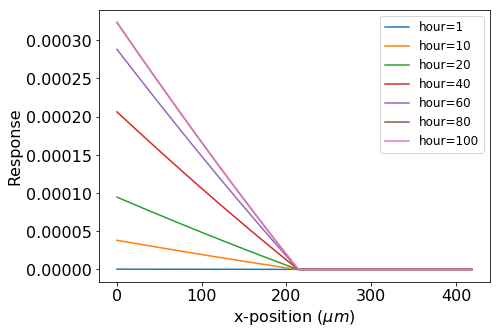

In [32]:
#response across space
fig = plt.figure(figsize=(x_dim,y_dim));
ax = plt.subplot(1,1,1);
fontsize = 16;
ax.tick_params(labelsize=fontsize);
ax.set_xlabel('x-position ($\mu{m}$)', fontsize=fontsize);
ax.set_ylabel('Response', fontsize=fontsize);
# ax.set_title("Response across space", fontsize=fontsize+2)


hrs = [1, 10, 20, 40, 60, 80, 100] #hours to plot 
for h in hrs:
    index = 120 * h;
    ax.plot(normed_s[index], label="hour={0}".format(h));
    
ax.legend(loc='best', fontsize= 12); 

plt.savefig('S_wrt_x.png', bbox_inches='tight')
plt.show();

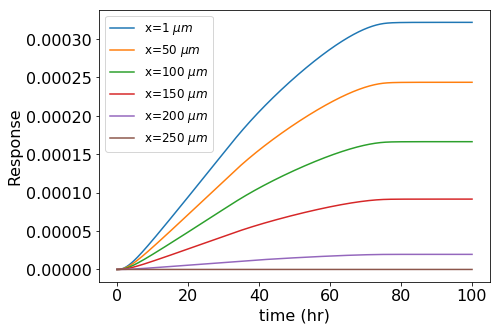

In [33]:
#response across time
fig = plt.figure(figsize=(x_dim,y_dim));
ax = plt.subplot(1,1,1);
fontsize = 16;
ax.tick_params(labelsize=fontsize);
ax.set_xlabel('time (hr)', fontsize=fontsize);
ax.set_ylabel('Response', fontsize=fontsize);
# ax.set_title("Response across time", fontsize=fontsize+2);

ax.set_xticks(np.arange(0, 12001, step=20*120))
ax.set_xticklabels(labels=[0,20,40,60,80,100])

xp = [1, 50, 100, 150, 200, 250] #x-points to plot 

for x in xp:
    ax.plot(normed_s[:,x], label="x={0} $\mu m$".format(x));
    
ax.legend(loc='best', fontsize= 12); 

plt.savefig('S_wrt_time.png', bbox_inches='tight')
plt.show();